# Problem Statement:
## Get Insights and provide recommendations to Netflix from data after processing.

In [50]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import missingno as msno
%matplotlib inline

In [3]:
data = pd.read_csv("netflix.csv")
data.head(8)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [15]:
data.tail(8)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [16]:
#  computes a summary of statistics pertaining to the DataFrame columns
data.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [17]:
# The info() method prints information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<AxesSubplot:>

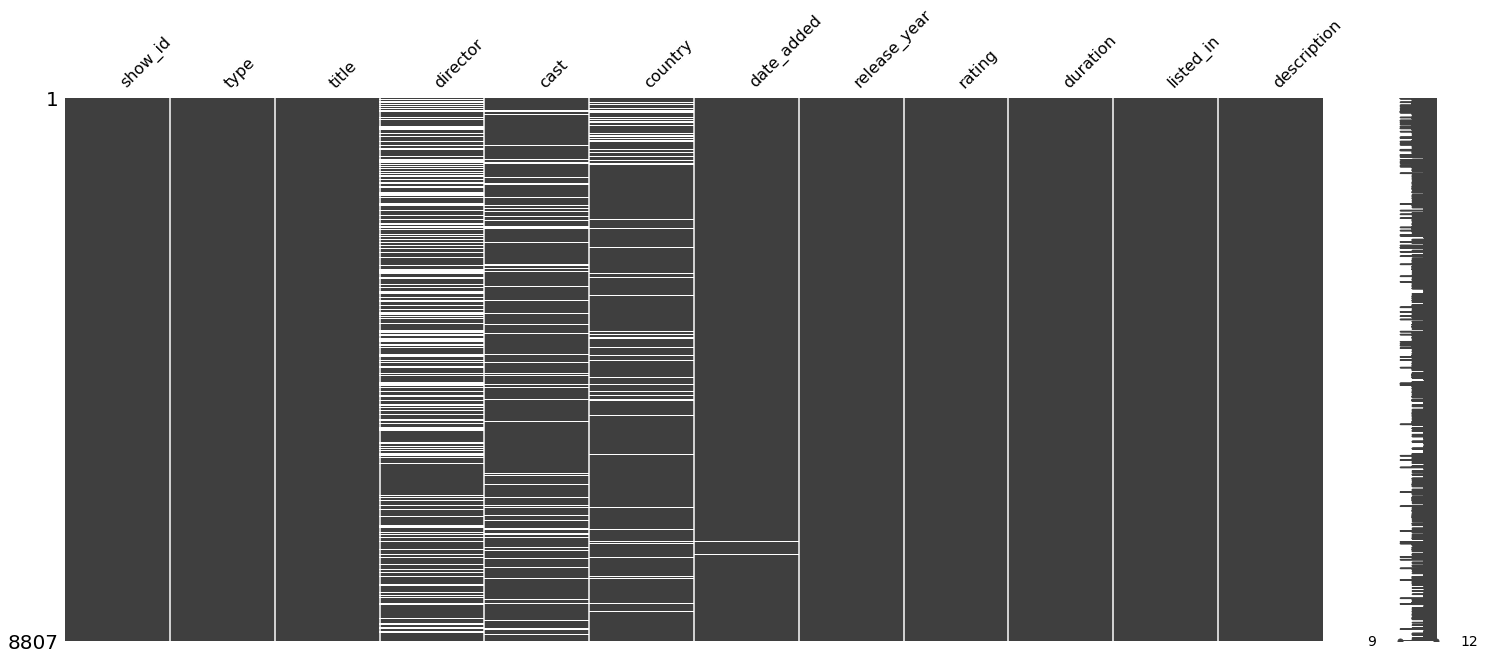

In [52]:
msno.matrix(data)

<AxesSubplot:>

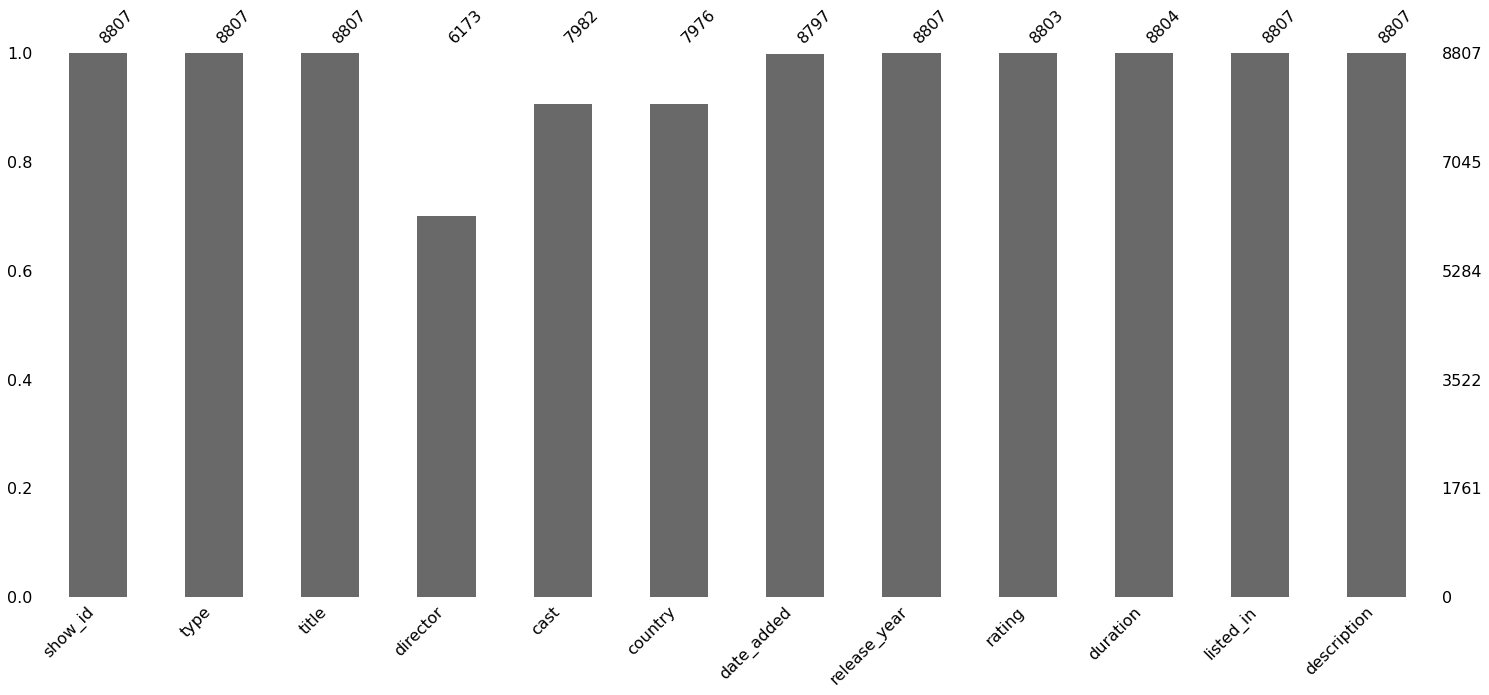

In [53]:
msno.bar(data)

<AxesSubplot:>

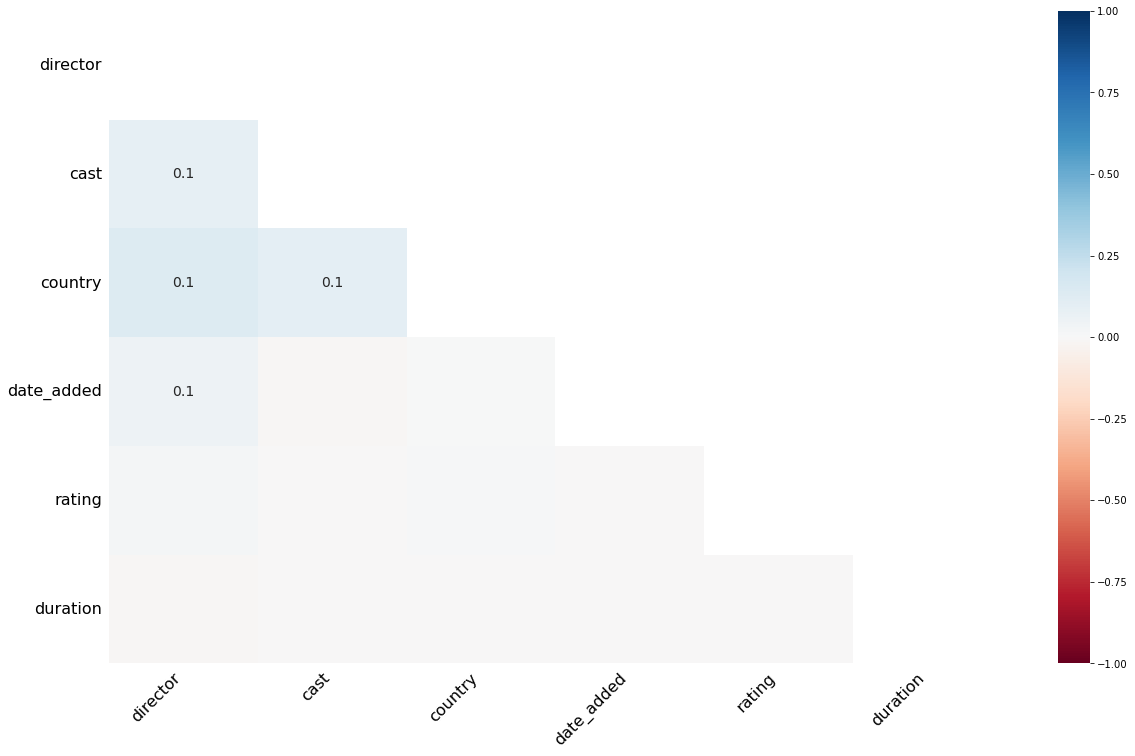

In [54]:
msno.heatmap(data)

In [18]:
data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
data.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
# returns the number of missing values in the data set. 
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [21]:
# Percentage of null values
data.isnull().sum()/len(data)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [22]:
data.shape

(8807, 12)

In [23]:
data.ndim

2

In [24]:
pd.DataFrame(data.cast.value_counts())

,cast
David Attenborough,19
"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil",14
Samuel West,10
Jeff Dunham,7
"David Spade, London Hughes, Fortune Feimster",6
...,...
"Michael Peña, Diego Luna, Tenoch Huerta, Joaquin Cosio, José María Yazpik, Matt Letscher, Alyssa Diaz",1
"Nick Lachey, Vanessa Lachey",1
"Takeru Sato, Kasumi Arimura, Haru, Kentaro Sakaguchi, Takayuki Yamada, Kendo Kobayashi, Ken Yasuda, Arata Furuta, Suzuki Matsuo, Koichi Yamadera, Arata Iura, Chikako Kaku, Kotaro Yoshida",1
"Toyin Abraham, Sambasa Nzeribe, Chioma Chukwuka Akpotha, Chioma Omeruah, Chiwetalu Agu, Dele Odule, Femi Adebayo, Bayray McNwizu, Biodun Stephen",1


In [25]:
# percentage of each value
data['cast'].value_counts(normalize = True)*100

David Attenborough                                                                                                                                                                            0.238036
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       0.175395
Samuel West                                                                                                                                                                                   0.125282
Jeff Dunham                                                                                                                                                                                   0.087697
David Spade, London Hughes, Fortune Feimster                                                                                                                                                  0.075169
     

In [26]:
data['type'].value_counts(normalize = True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

<AxesSubplot:ylabel='type'>

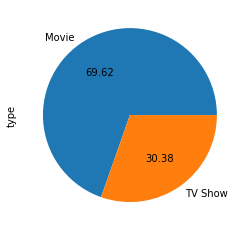

In [27]:
data['type'].value_counts().plot(kind = 'pie', autopct = '%.2f')

In [28]:
data[data.cast == 'David Attenborough']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
997,s998,TV Show,Life in Color with David Attenborough,NaN,David Attenborough,"Australia, United Kingdom","April 22, 2021",2021,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...","Using innovative technology, this docuseries e..."
1886,s1887,Movie,David Attenborough: A Life on Our Planet,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",David Attenborough,"United States, United Kingdom","October 4, 2020",2020,PG,84 min,Documentaries,"A broadcaster recounts his life, and the evolu..."
3573,s3574,Movie,Our Planet - Behind The Scenes,NaN,David Attenborough,United Kingdom,"August 20, 2019",2019,TV-G,63 min,Documentaries,Years spent recording footage of creatures fro...
3938,s3939,TV Show,Our Planet,NaN,David Attenborough,"United States, United Kingdom","April 5, 2019",2019,TV-PG,1 Season,"Docuseries, Science & Nature TV",Experience our planet's natural beauty and exa...
6094,s6095,TV Show,Africa,NaN,David Attenborough,United Kingdom,"April 28, 2016",2013,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",This five-part nature series chronicles fascin...
6341,s6342,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,"December 3, 2018",2017,TV-G,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...
6810,s6811,TV Show,Frozen Planet,Alastair Fothergill,David Attenborough,"United Kingdom, United States, Spain, Germany,...","January 28, 2016",2011,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",Go on a journey through the Arctic and Antarct...
6811,s6812,Movie,Frozen Planet: On Thin Ice,NaN,David Attenborough,"United Kingdom, United States, Spain, Germany,...","January 28, 2016",2011,TV-PG,47 min,Movies,David Attenborough journeys to both polar regi...
6812,s6813,Movie,Frozen Planet: The Epic Journey,NaN,David Attenborough,"United Kingdom, United States, Spain, Germany,...","January 28, 2016",2011,TV-PG,52 min,Movies,Collecting highlights from the epic documentar...
7300,s7301,TV Show,Life on Location,NaN,David Attenborough,United States,"April 22, 2015",2009,TV-G,1 Season,"British TV Shows, Docuseries, Science & Nature TV","Members of the BBC's ""Life"" production crew go..."


In [29]:
data[data.cast == 'David Spade, London Hughes, Fortune Feimster']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
470,s471,Movie,Bridgerton - The Afterparty,NaN,"David Spade, London Hughes, Fortune Feimster",NaN,"July 13, 2021",2021,TV-14,39 min,Movies,"""Bridgerton"" cast members share behind-the-sce..."
729,s730,Movie,Bling Empire - The Afterparty,NaN,"David Spade, London Hughes, Fortune Feimster",NaN,"June 12, 2021",2021,TV-MA,36 min,Movies,"The stars of ""Bling Empire"" discuss the show's..."
730,s731,Movie,Cobra Kai - The Afterparty,NaN,"David Spade, London Hughes, Fortune Feimster",NaN,"June 12, 2021",2021,TV-MA,34 min,Movies,"Ralph Macchio, William Zabka and more from the..."
912,s913,Movie,The Circle - The Afterparty,NaN,"David Spade, London Hughes, Fortune Feimster",NaN,"May 7, 2021",2021,TV-14,35 min,Comedies,"Stars of ""The Circle"" drop by to discuss Seaso..."
1553,s1554,Movie,The Netflix Afterparty: The Best Shows of The ...,NaN,"David Spade, London Hughes, Fortune Feimster",United States,"December 13, 2020",2020,TV-MA,59 min,Comedies,"David Spade, Fortune Feimster and London Hughe..."
8437,s8438,TV Show,The Netflix Afterparty,NaN,"David Spade, London Hughes, Fortune Feimster",United States,"January 2, 2021",2021,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies","Hosts David Spade, Fortune Feimster and London..."


In [18]:
pd.DataFrame(data.release_year.value_counts())

,release_year
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1925,1
1961,1
1947,1


In [39]:
data_cast = data[['cast', 'title']]
data_cast

,cast,title
0,NaN,Dick Johnson Is Dead
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Blood & Water
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Ganglands
3,NaN,Jailbirds New Orleans
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",Kota Factory
...,...,...
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",Zodiac
8803,NaN,Zombie Dumb
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",Zombieland
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",Zoom


In [40]:
data_cast.index = data_cast.title
data_cast

,cast,title
title,,
Dick Johnson Is Dead,NaN,Dick Johnson Is Dead
Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Blood & Water
Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Ganglands
Jailbirds New Orleans,NaN,Jailbirds New Orleans
Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",Kota Factory
...,...,...
Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",Zodiac
Zombie Dumb,NaN,Zombie Dumb
Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",Zombieland


In [41]:
data.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [42]:
# Unnesting the cast column and converting into list
restricted_cast = data.cast.apply(lambda x: str(x).split(', ')).tolist()


In [47]:
new_data1 = pd.DataFrame(restricted_cast, index = data['title'])
new_data1

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


<AxesSubplot:>

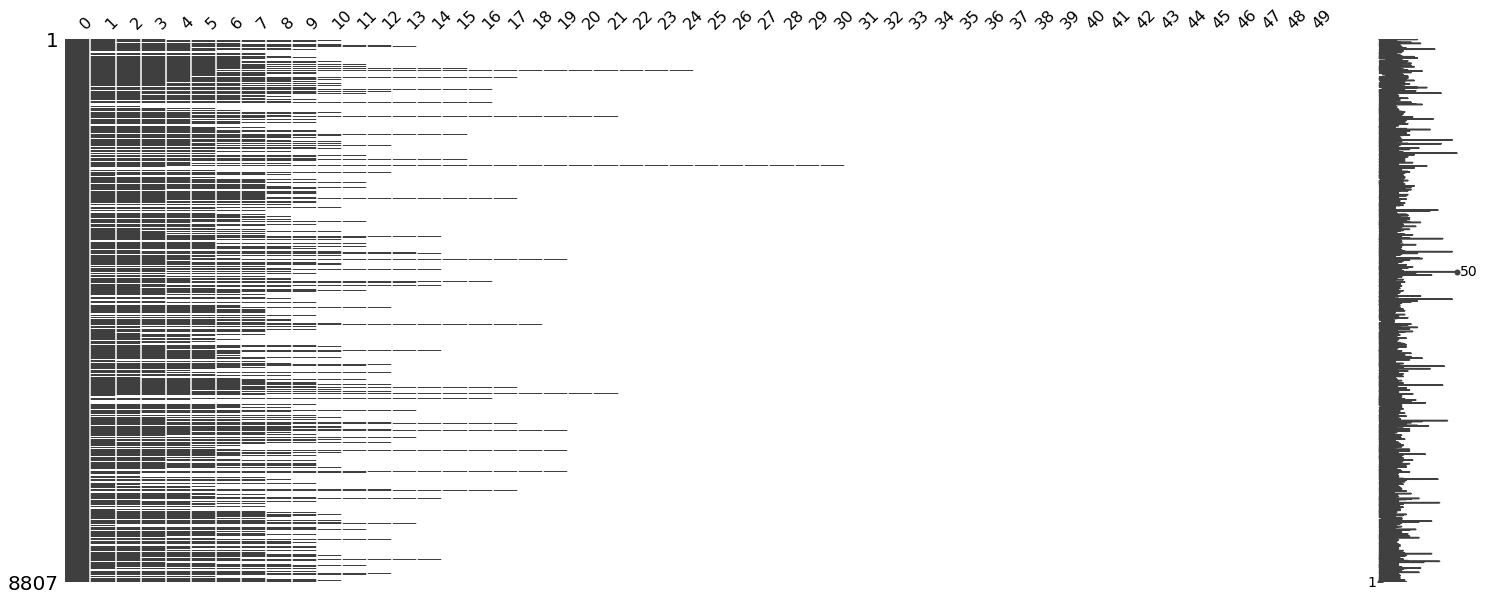

In [55]:
msno.matrix(new_data1)

<AxesSubplot:>

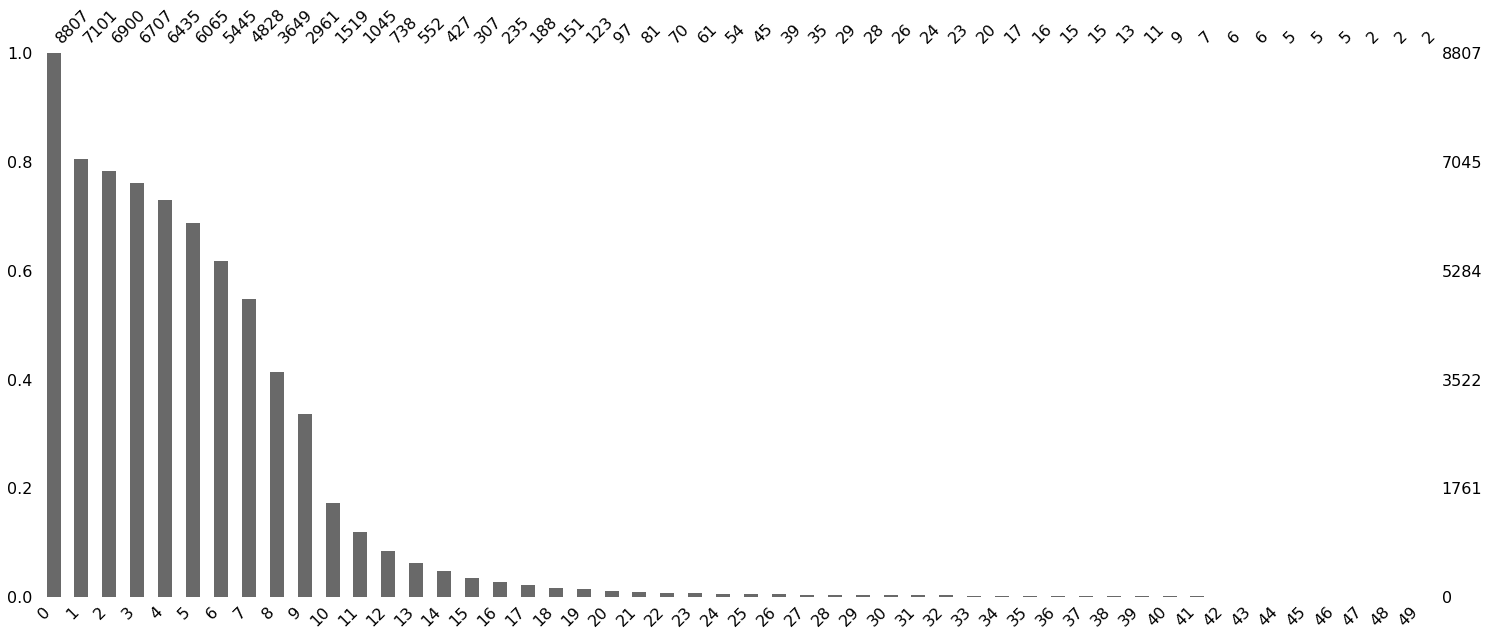

In [56]:
msno.bar(new_data1)

<AxesSubplot:>

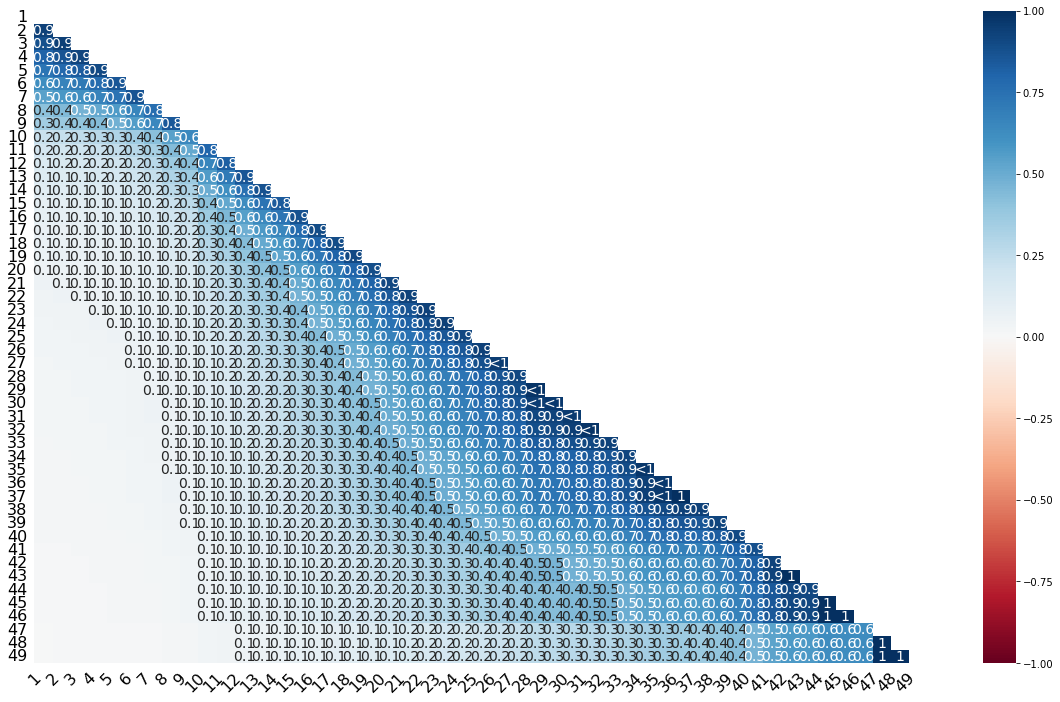

In [60]:
msno.heatmap(new_data1)

In [61]:
new_data1 = pd.DataFrame(new_data1.stack())
new_data1

0
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[64951 rows x 1 columns]

In [62]:
new_data1.reset_index(inplace = True)
new_data1

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
64946,Zubaan,3,Manish Chaudhary
64947,Zubaan,4,Meghna Malik
64948,Zubaan,5,Malkeet Rauni
64949,Zubaan,6,Anita Shabdish


In [63]:
new_data1 = new_data1[['title', 0]]
new_data1

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [64]:
new_data1.columns = ['title', 'cast']
new_data1

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [65]:
# Unnesting the DIRECTOR column and converting into list
restricted_director = data.director.apply(lambda x: str(x).split(', ')).tolist()
restricted_director

[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', 'José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['nan'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['nan'],
 ['nan'],
 ['Pedro de Echave García', 'Pablo Azorín Williams'],
 ['nan'],
 ['Adam Salky'],
 ['nan'],
 ['Olivier Megaton'],
 ['nan'],
 ['K.S. Ravikumar'],
 ['Alex Woo', 'Stanley Moore'],
 ['S. Shankar'],
 ['nan'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', 'Abhishek Chaubey', 'Saket Chaudhary'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['nan'],
 ['George Nolfi'],
 ['nan'],
 ['nan'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['nan'],
 ['nan'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 

In [66]:
new_data2 = pd.DataFrame(restricted_director, index = data['title'])
new_data2

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,nan,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,nan,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,None,None,None
Zombieland,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None


<AxesSubplot:>

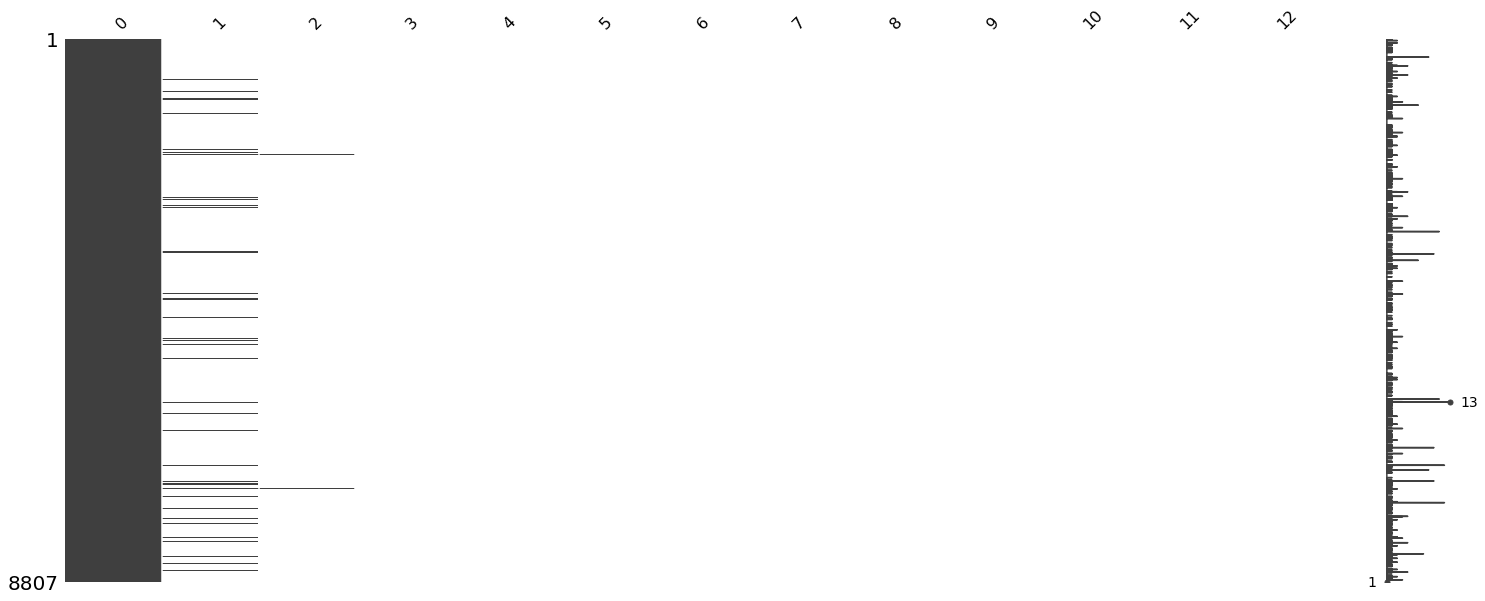

In [67]:
msno.matrix(new_data2)

<AxesSubplot:>

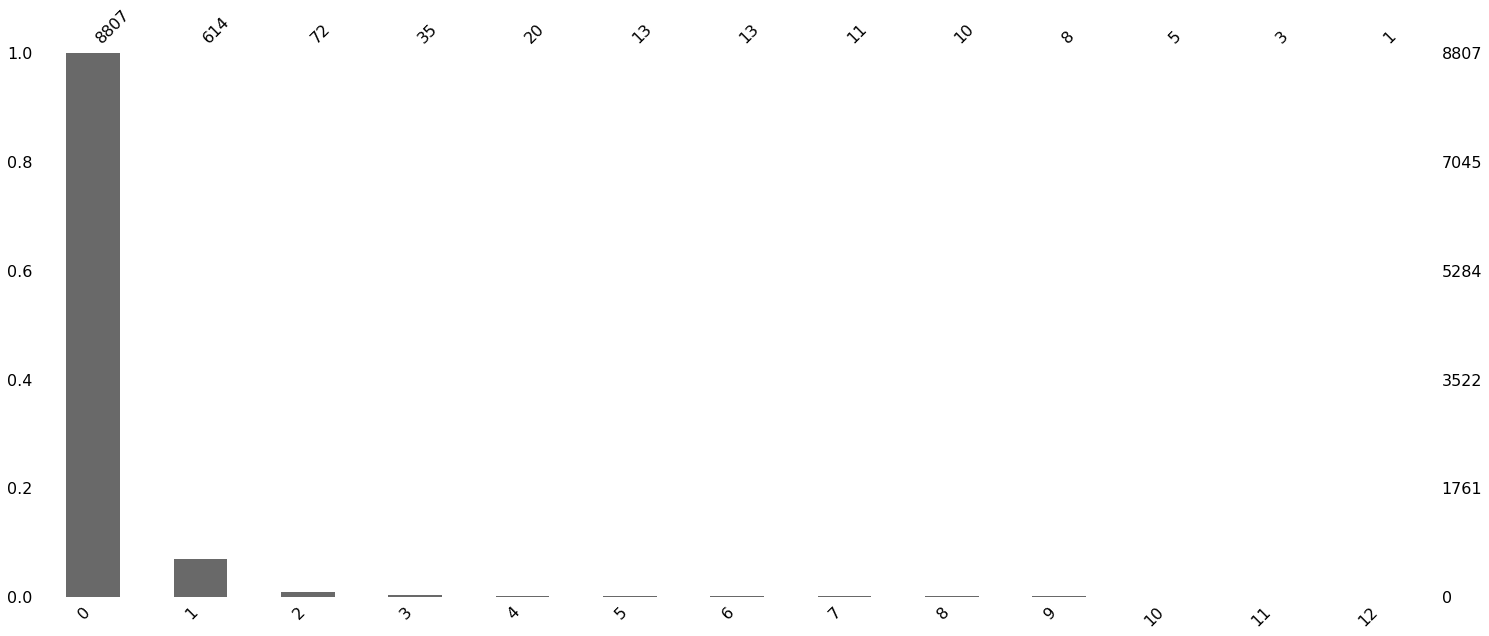

In [70]:
msno.bar(new_data2)

In [71]:
new_data2 = pd.DataFrame(new_data2.stack())
new_data2.head(30)

0
title                                                                       
Dick Johnson Is Dead                               0         Kirsten Johnson
Blood & Water                                      0                     nan
Ganglands                                          0         Julien Leclercq
Jailbirds New Orleans                              0                     nan
Kota Factory                                       0                     nan
Midnight Mass                                      0           Mike Flanagan
My Little Pony: A New Generation                   0           Robert Cullen
                                                   1          José Luis Ucha
Sankofa                                            0            Haile Gerima
The Great British Baking Show                      0         Andy Devonshire
The Starling                                       0          Theodore Melfi
Vendetta: Truth, Lies and The Mafia                0                     nan
Bangkok Breaking                                   0       Kongkiat Komesiri
Je Suis Karl                                       0     Christian Schwochow
Confessions of an Invisible Girl                   0           Bruno Garotti
Crime Stories: India Detectives                    0                     nan
Dear White People                                  0                     nan
Europe's Most Dangerous Man: Otto Skorzeny in S... 0  Pedro de Echave García
                                                   1   Pablo Azorín Williams
Falsa identidad                                    0                     nan
Intrusion                                          0              Adam Salky
Jaguar                                             0                     nan
Monsters Inside: The 24 Faces of Billy Milligan    0         Olivier Megaton
Resurrection: Ertugrul                             0                     nan
Avvai Shanmughi                                    0          K.S. Ravikumar
Go! Go! Cory Carson: Chrissy Takes the Wheel       0                Alex Woo
                                                   1           Stanley Moore
Jeans                                              0              S. Shankar
Love on the Spectrum                               0                     nan
Minsara Kanavu                                     0             Rajiv Menon

In [72]:
new_data2.reset_index(inplace = True)
new_data2

,title,level_1,0
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Blood & Water,0,nan
2,Ganglands,0,Julien Leclercq
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,nan
...,...,...,...
9607,Zodiac,0,David Fincher
9608,Zombie Dumb,0,nan
9609,Zombieland,0,Ruben Fleischer
9610,Zoom,0,Peter Hewitt


In [73]:
new_data2 = new_data2[['title', 0]]
new_data2

,title,0
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [74]:
new_data2.columns = ['title', 'director']
new_data2

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


<AxesSubplot:>

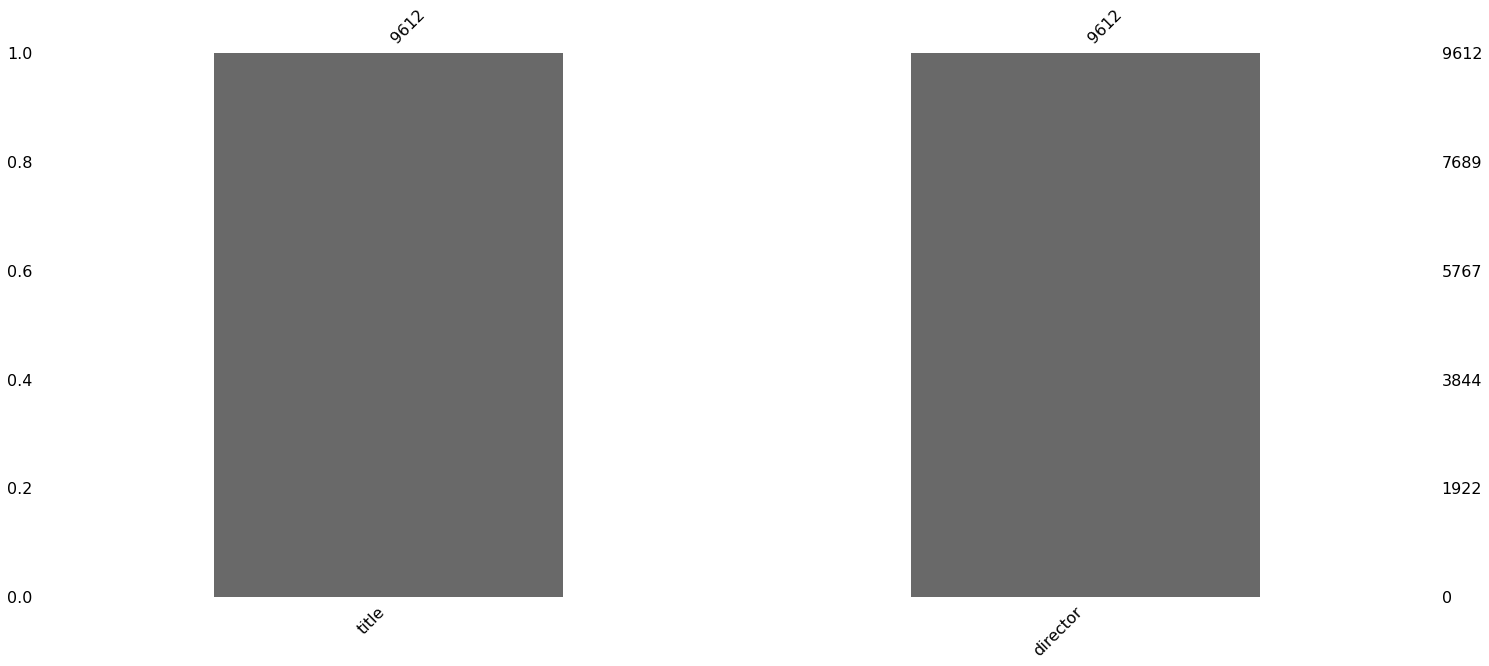

In [78]:
import missingno as msno
msno.bar(new_data2)

In [79]:
# Merging director and cast columns only
data_director_cast = new_data1.merge(new_data2, on = 'title', how = 'inner')
data_director_cast

,title,cast,director
0,Dick Johnson Is Dead,nan,Kirsten Johnson
1,Blood & Water,Ama Qamata,nan
2,Blood & Water,Khosi Ngema,nan
3,Blood & Water,Gail Mabalane,nan
4,Blood & Water,Thabang Molaba,nan
...,...,...,...
70807,Zubaan,Manish Chaudhary,Mozez Singh
70808,Zubaan,Meghna Malik,Mozez Singh
70809,Zubaan,Malkeet Rauni,Mozez Singh
70810,Zubaan,Anita Shabdish,Mozez Singh


<AxesSubplot:>

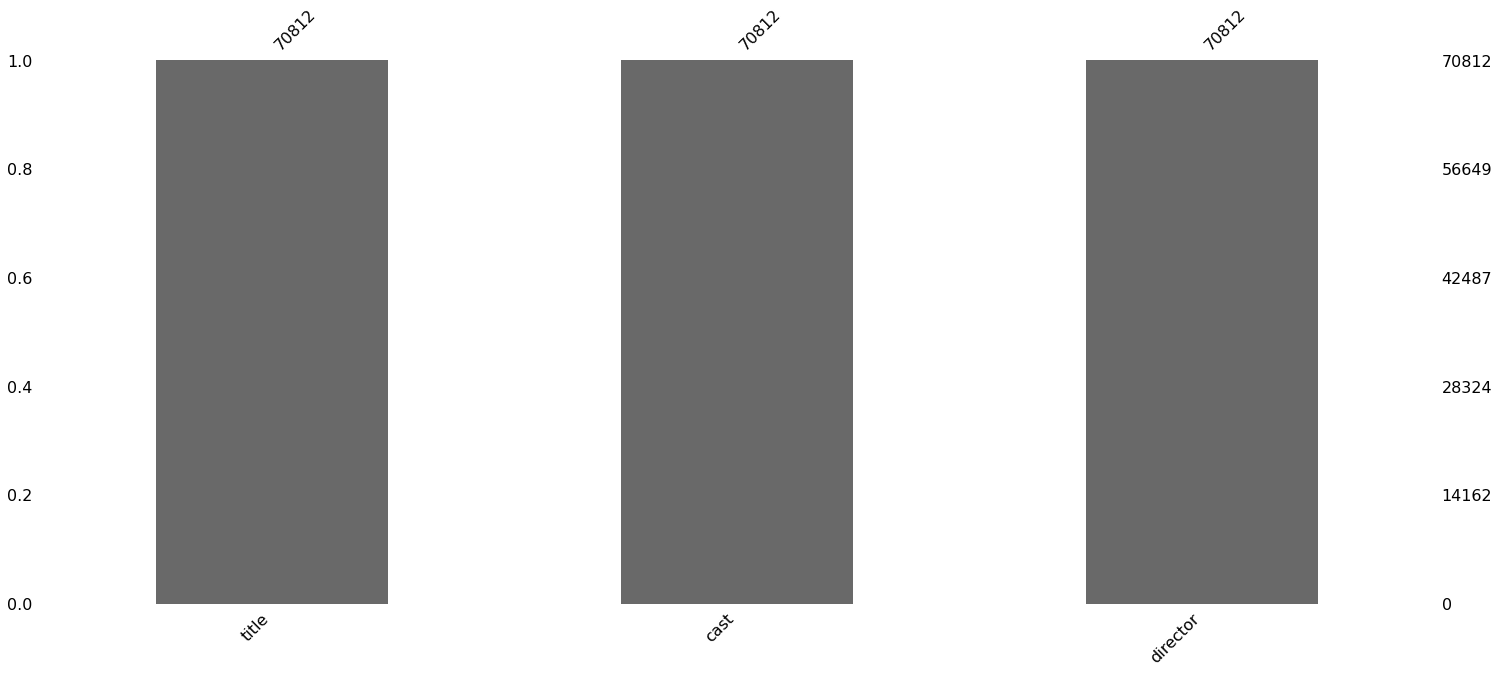

In [80]:
msno.bar(data_director_cast)

In [81]:
# Unnesting the COUNTRY column and converting into list
restricted_country = data.country.apply(lambda x: str(x).split(', ')).tolist()

new_data3 = pd.DataFrame(restricted_country, index = data['title'])

new_data3 = pd.DataFrame(new_data3.stack())

new_data3.reset_index(inplace = True)
print(new_data3)
new_data3 = new_data3[['title', 0]]

new_data3.columns = ['title', 'country']
new_data3

                       title  level_1              0
0       Dick Johnson Is Dead        0  United States
1              Blood & Water        0   South Africa
2                  Ganglands        0            nan
3      Jailbirds New Orleans        0            nan
4               Kota Factory        0          India
...                      ...      ...            ...
10840                 Zodiac        0  United States
10841            Zombie Dumb        0            nan
10842             Zombieland        0  United States
10843                   Zoom        0  United States
10844                 Zubaan        0          India

[10845 rows x 3 columns]


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


In [82]:
# Merging director and cast and country columns only
data_director_cast_country = data_director_cast.merge(new_data3, on = 'title', how = 'inner')
data_director_cast_country

,title,cast,director,country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States
1,Blood & Water,Ama Qamata,nan,South Africa
2,Blood & Water,Khosi Ngema,nan,South Africa
3,Blood & Water,Gail Mabalane,nan,South Africa
4,Blood & Water,Thabang Molaba,nan,South Africa
...,...,...,...,...
89377,Zubaan,Manish Chaudhary,Mozez Singh,India
89378,Zubaan,Meghna Malik,Mozez Singh,India
89379,Zubaan,Malkeet Rauni,Mozez Singh,India
89380,Zubaan,Anita Shabdish,Mozez Singh,India


In [83]:
# Unnesting the LISTED_IN column and converting into list
restricted_listed = data.listed_in.apply(lambda x: str(x).split(', ')).tolist()

new_data4 = pd.DataFrame(restricted_listed, index = data['title'])

new_data4 = pd.DataFrame(new_data4.stack())

new_data4.reset_index(inplace = True)
print(new_data4)
new_data4 = new_data4[['title', 0]]

new_data4.columns = ['title', 'listed_in']
new_data4

                      title  level_1                         0
0      Dick Johnson Is Dead        0             Documentaries
1             Blood & Water        0    International TV Shows
2             Blood & Water        1                 TV Dramas
3             Blood & Water        2              TV Mysteries
4                 Ganglands        0            Crime TV Shows
...                     ...      ...                       ...
19318                  Zoom        0  Children & Family Movies
19319                  Zoom        1                  Comedies
19320                Zubaan        0                    Dramas
19321                Zubaan        1      International Movies
19322                Zubaan        2          Music & Musicals

[19323 rows x 3 columns]


,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [84]:
# Merging director, cast, country and listed_in columns only
data_director_cast_country_listed = data_director_cast_country.merge(new_data4, on = 'title', how = 'inner')
data_director_cast_country_listed

,title,cast,director,country,listed_in
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows
...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [85]:
data_trim = data.drop(['director', 'country', 'cast', 'listed_in'], axis = 1)
data_trim

,show_id,type,title,date_added,release_year,rating,duration,description
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019",2007,R,158 min,"A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"November 1, 2019",2009,R,88 min,Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"January 11, 2020",2006,PG,88 min,"Dragged from civilian life, a former superhero..."


In [90]:
# Merging all the columns in trim data
data_merged = data_trim.merge(data_director_cast_country_listed, on= 'title',how = 'inner')
data_merged

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,International Movies
201987,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,Music & Musicals
201988,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,Dramas
201989,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,International Movies


# UNIQUE attribute and value count
### Overall

In [110]:
data_merged.nunique()

show_id          8807
type                2
title            8807
date_added       1767
release_year       74
rating             17
duration          220
description      8775
cast            36440
director         4994
country           128
listed_in          42
dtype: int64

### Unique Values

In [139]:
pd.DataFrame(data_merged.listed_in.unique(), columns = ['GENRE'])

,GENRE
0,Documentaries
1,International TV Shows
2,TV Dramas
3,TV Mysteries
4,Crime TV Shows
5,TV Action & Adventure
6,Docuseries
7,Reality TV
8,Romantic TV Shows
9,TV Comedies


In [138]:
pd.DataFrame(data_merged.country.unique(),columns = ['COUNTRY'])

,COUNTRY
0,United States
1,South Africa
2,nan
3,India
4,Ghana
...,...
123,Sudan
124,Panama
125,Uganda
126,East Germany


In [137]:
pd.DataFrame(data_merged.release_year.unique(),columns = ['RELEASE_YEAR'])

,RELEASE_YEAR
0,2020
1,2021
2,1993
3,2018
4,1996
...,...
69,1942
70,1955
71,1944
72,1947


In [135]:

pd.DataFrame(data_merged.rating.unique(), columns = ['RATING'])

,RATING
0,PG-13
1,TV-MA
2,PG
3,TV-14
4,TV-PG
5,TV-Y
6,TV-Y7
7,R
8,TV-G
9,G


### Value_counts

In [147]:
pd.DataFrame(data_merged['country'].value_counts())

,country
United States,59349
India,22814
United Kingdom,12945
nan,11897
Japan,8679
...,...
Palestine,2
Kazakhstan,1
Nicaragua,1
"United States,",1


In [119]:
pd.DataFrame(data_merged.listed_in.value_counts())

,listed_in
Dramas,29775
International Movies,28211
Comedies,20829
International TV Shows,12845
Action & Adventure,12216
Independent Movies,9834
Children & Family Movies,9771
TV Dramas,8942
Thrillers,7107
Romantic Movies,6412


In [140]:
pd.DataFrame(data_merged.rating.value_counts())

,rating
TV-MA,73867
TV-14,43931
R,25860
PG-13,16246
TV-PG,14926
PG,10919
TV-Y7,6304
TV-Y,3665
TV-G,2779
NR,1573


In [141]:
pd.DataFrame(data_merged.release_year.value_counts())

,release_year
2018,24414
2019,21931
2017,20516
2020,19679
2016,18465
...,...
1947,8
1946,6
1942,6
1943,5


In [148]:
pd.DataFrame(data_merged.title.value_counts())

,title
Kahlil Gibran's The Prophet,700
Holidays,504
Movie 43,468
The Eddy,416
Narcos,378
...,...
Thackeray,1
The 2000s,1
Miniforce: Super Dino Power,1
Dancing with the Birds,1


In [112]:
pd.DataFrame(data_merged.value_counts())

0
show_id type  title                date_added      release_year rating duration description                                        cast            director     country       listed_in              
s3719   Movie Blood Will Tell      June 21, 2019   2019         TV-MA  113 min  Family patriarch Elías begins to unravel after ... Diego Velázquez Miguel Cohan Argentina     Independent Movies    2
                                                                                                                                   Dolores Fonzi   Miguel Cohan Argentina     International Movies  2
                                                                                                                                   Malena Sánchez  Miguel Cohan United States Dramas                2
                                                                                                                                                                              Independent Movies    2
                                                                                                                                                                              International Movies  2
...                                                                                                                                                                                                ..
s3548   Movie Back to School       August 30, 2019 2019         TV-MA  84 min   Eager to flaunt their success in front of old b... Marc Riso       Rémy Four    nan           Comedies              1
                                                                                                                                                                              International Movies  1
                                                                                                                                   Nicolas Berno   Julien War   nan           Comedies              1
                                                                                                                                                                              International Movies  1
s999    Movie Searching For Sheela April 22, 2021  2021         TV-14  58 min   Journalists and fans await Ma Anand Sheela as t... Ma Anand Sheela nan          India         International Movies  1

[201708 rows x 1 columns]

In [93]:
pd.DataFrame(data_merged.groupby('release_year').count())

,show_id,type,title,date_added,rating,duration,description,cast,director,country,listed_in
release_year,,,,,,,,,,,
1925,1,1,1,1,1,1,1,1,1,1,1
1942,6,6,6,6,6,6,6,6,6,6,6
1943,5,5,5,5,5,5,5,5,5,5,5
1944,24,24,24,24,24,24,24,24,24,24,24
1945,13,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...
2017,20516,20516,20516,20516,20514,20515,20516,20516,20516,20516,20516
2018,24414,24414,24414,24413,24414,24414,24414,24414,24414,24414,24414
2019,21931,21931,21931,21931,21931,21931,21931,21931,21931,21931,21931


In [94]:
pd.DataFrame(data_merged.groupby(['release_year','type']).count())

show_id  title  date_added  rating  duration  \
release_year type                                                    
1925         TV Show        1      1           1       1         1   
1942         Movie          6      6           6       6         6   
1943         Movie          5      5           5       5         5   
1944         Movie         24     24          24      24        24   
1945         Movie         12     12          12      12        12   
...                       ...    ...         ...     ...       ...   
2019         TV Show    10005  10005       10005   10005     10005   
2020         Movie       9590   9590        9590    9590      9590   
             TV Show    10089  10089       10089   10089     10089   
2021         Movie       5427   5427        5427    5427      5427   
             TV Show     6467   6467        6467    6467      6467   

                      description   cast  director  country  listed_in  
release_year type                                                       
1925         TV Show            1      1         1        1          1  
1942         Movie              6      6         6        6          6  
1943         Movie              5      5         5        5          5  
1944         Movie             24     24        24       24         24  
1945         Movie             12     12        12       12         12  
...                           ...    ...       ...      ...        ...  
2019         TV Show        10005  10005     10005    10005      10005  
2020         Movie           9590   9590      9590     9590       9590  
             TV Show        10089  10089     10089    10089      10089  
2021         Movie           5427   5427      5427     5427       5427  
             TV Show         6467   6467      6467     6467       6467  

[119 rows x 10 columns]

In [95]:
pd.DataFrame(data_merged.groupby('release_year').value_counts())

0
release_year show_id type    title                             date_added        rating duration description                                        cast              director     country       listed_in                  
1925         s4251   TV Show Pioneers: First Women Filmmakers* December 30, 2018 TV-14  1 Season This collection restores films from women who t... nan               nan          nan           TV Shows                  1
1942         s7791   Movie   Prelude to War                    March 31, 2017    TV-14  52 min   Frank Capra's documentary chronicles the rise o... nan               Frank Capra  United States Documentaries             1
             s8206   Movie   The Battle of Midway              March 31, 2017    TV-14  18 min   Director John Ford captures combat footage of t... Henry Fonda       John Ford    United States Classic Movies            1
                                                                                                                                                                                                 Documentaries             1
                                                                                                                                                    Jane Darwell      John Ford    United States Classic Movies            1
...                                                                                                                                                                                                                       ..
2021         s1379   Movie   Penguin Bloom                     January 27, 2021  TV-14  95 min   As a mom copes with the aftermath of a harrowin... Abe Clifford-Barr Glendyn Ivin Australia     Children & Family Movies  1
                                                                                                                                                                                                 Dramas                    1
                                                                                                                                                                                   United States Children & Family Movies  1
                                                                                                                                                                                                 Dramas                    1
             s999    Movie   Searching For Sheela              April 22, 2021    TV-14  58 min   Journalists and fans await Ma Anand Sheela as t... Ma Anand Sheela   nan          India         International Movies      1

[201708 rows x 1 columns]

In [113]:
pd.DataFrame(data_merged.nunique())

,0
show_id,8807
type,2
title,8807
date_added,1767
release_year,74
rating,17
duration,220
description,8775
cast,36440
director,4994


In [114]:
pd.DataFrame(data_merged.listed_in.value_counts())

,listed_in
Dramas,29775
International Movies,28211
Comedies,20829
International TV Shows,12845
Action & Adventure,12216
Independent Movies,9834
Children & Family Movies,9771
TV Dramas,8942
Thrillers,7107
Romantic Movies,6412


In [149]:
pd.DataFrame(data_merged.listed_in.unique())

,0
0,Documentaries
1,International TV Shows
2,TV Dramas
3,TV Mysteries
4,Crime TV Shows
5,TV Action & Adventure
6,Docuseries
7,Reality TV
8,Romantic TV Shows
9,TV Comedies


In [150]:
# Most popular actor is Anupam Kher
y = data_merged.groupby('cast')['title'].nunique().sort_values(ascending = False)
y

cast
nan                 825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
                   ... 
Jamie Lee             1
Jamie Kenna           1
Jamie Kaler           1
Jamie Johnston        1
Ṣọpẹ́ Dìrísù          1
Name: title, Length: 36440, dtype: int64

In [151]:
data_merged.groupby('title')['cast'].nunique()

title
#Alive                           2
#AnneFrank - Parallel Stories    2
#FriendButMarried                8
#FriendButMarried 2              8
#Roxy                            8
                                ..
忍者ハットリくん                         1
海的儿子                             5
마녀사냥                             5
반드시 잡는다                          1
최강전사 미니특공대 : 영웅의 탄생              6
Name: cast, Length: 8807, dtype: int64

In [152]:
# Multi-Starred Cast
data_merged.groupby('title')['cast'].nunique().sort_values(ascending = False)

title
Social Distance                    50
Black Mirror                       50
Creeped Out                        47
COMEDIANS of the world             47
Heartbreak High                    47
                                   ..
Little Singham in London            1
Little Singham: Kaal Ki Tabaahi     1
The Minimighty Kids                 1
The Minimalists: Less Is Now        1
Iliza Shlesinger: War Paint         1
Name: cast, Length: 8807, dtype: int64

In [153]:
# Best cast in every genras
data_merged.groupby('listed_in')['cast'].nunique().sort_values(ascending = False)

listed_in
Dramas                          14228
International Movies            13443
Comedies                        10148
International TV Shows           8752
TV Dramas                        6671
Action & Adventure               5793
Independent Movies               5368
Romantic Movies                  4329
Thrillers                        4029
TV Comedies                      3904
Children & Family Movies         3835
Crime TV Shows                   3596
Horror Movies                    2751
Romantic TV Shows                2542
Kids' TV                         2400
Music & Musicals                 2029
Sci-Fi & Fantasy                 1964
TV Action & Adventure            1700
Spanish-Language TV Shows        1452
British TV Shows                 1159
Documentaries                    1093
Sports Movies                    1072
TV Mysteries                     1045
Anime Series                      967
Classic Movies                    922
Korean TV Shows                   876
TV

In [154]:
data_merged

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,International Movies
201987,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,Music & Musicals
201988,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,Dramas
201989,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [155]:
# Famous actor in every country
pd.DataFrame(data_merged.groupby('country')['cast'].max())

,cast
country,
,Walid Abdul Salam
Afghanistan,Sohrab Nazari
Albania,Marco Giallini
Algeria,Youssef Wahby
Angola,Raul Rosario
...,...
Venezuela,nan
Vietnam,Truong Hoang Hanh Thy
West Germany,nan


In [156]:
pd.DataFrame(data_merged.groupby('country').agg({'cast':[max]}))

,cast
,max
country,
,Walid Abdul Salam
Afghanistan,Sohrab Nazari
Albania,Marco Giallini
Algeria,Youssef Wahby
Angola,Raul Rosario
...,...
Venezuela,nan
Vietnam,Truong Hoang Hanh Thy


In [157]:
# Unnesting the duration column and converting into list
# data_duration = data[data['type'] == 'Movie']
# print(data_duration)
restricted_duration = data.duration.apply(lambda x: str(x).split(' ')).tolist()


new_data5 = pd.DataFrame(restricted_duration, index = data['title'])


new_data5 = new_data5[new_data5[1]== 'min']
new_data5
new_data5.drop(1, inplace = True, axis = 1)
new_data5.reset_index(inplace = True)

new_data5 = new_data5[['title', 0]]

new_data5.columns = ['title', 'duration']
new_data5


,title,duration
0,Dick Johnson Is Dead,90
1,My Little Pony: A New Generation,91
2,Sankofa,125
3,The Starling,104
4,Je Suis Karl,127
...,...,...
6123,Zinzana,96
6124,Zodiac,158
6125,Zombieland,88
6126,Zoom,88


In [158]:
data_merged.drop('duration', inplace = True, axis = 1)

In [164]:
# Duration merged

data_merged_duration = new_data5.merge(data_merged, on= 'title',how = 'inner')
data_merged_duration

,title,duration,show_id,type,date_added,release_year,rating,description,cast,director,country,listed_in
0,Dick Johnson Is Dead,90,s1,Movie,"September 25, 2021",2020,PG-13,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States,Documentaries
1,My Little Pony: A New Generation,91,s7,Movie,"September 24, 2021",2021,PG,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,Robert Cullen,nan,Children & Family Movies
2,My Little Pony: A New Generation,91,s7,Movie,"September 24, 2021",2021,PG,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,José Luis Ucha,nan,Children & Family Movies
3,My Little Pony: A New Generation,91,s7,Movie,"September 24, 2021",2021,PG,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,Robert Cullen,nan,Children & Family Movies
4,My Little Pony: A New Generation,91,s7,Movie,"September 24, 2021",2021,PG,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,José Luis Ucha,nan,Children & Family Movies
...,...,...,...,...,...,...,...,...,...,...,...,...
145835,Zubaan,111,s8807,Movie,"March 2, 2019",2015,TV-14,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,International Movies
145836,Zubaan,111,s8807,Movie,"March 2, 2019",2015,TV-14,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,Music & Musicals
145837,Zubaan,111,s8807,Movie,"March 2, 2019",2015,TV-14,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,Dramas
145838,Zubaan,111,s8807,Movie,"March 2, 2019",2015,TV-14,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [167]:
# Converting object datatype to int type
data_merged_duration.duration = data_merged_duration.duration.astype('int16')

In [168]:
data_merged_duration.dtypes

title           object
duration         int16
show_id         object
type            object
date_added      object
release_year     int64
rating          object
description     object
cast            object
director        object
country         object
listed_in       object
dtype: object

### Avg Runtime for every movie

In [169]:

data_merged_duration.duration.mean()

106.85645227646737

In [170]:
data_merged_duration.duration.max()

312

In [171]:
data_merged_duration.duration.min()

3

### For which genre we see maximum Total runtime

In [193]:

max_runtime_genre = data_merged_duration.groupby('listed_in')['duration'].sum().sort_values(ascending = False)
max_runtime_genre

listed_in
Dramas                      3373593.0
International Movies        3160216.0
Comedies                    2125063.0
Action & Adventure          1382440.0
Independent Movies          1010770.0
Children & Family Movies     834754.0
Thrillers                    769876.0
Romantic Movies              705405.0
Horror Movies                452616.0
Sci-Fi & Fantasy             438931.0
Music & Musicals             344764.0
Documentaries                208967.0
Classic Movies               182089.0
Sports Movies                155074.0
Cult Movies                  119584.0
Anime Features               100237.0
LGBTQ Movies                  84039.0
Faith & Spirituality          78376.0
Stand-Up Comedy               37176.0
Movies                        19975.0
Name: duration, dtype: float64

In [194]:

max_runtime_year = data_merged_duration.groupby('release_year')['duration'].sum().sort_values(ascending = False)
max_runtime_year

release_year
2018    1774341.0
2017    1546067.0
2016    1431431.0
2019    1213088.0
2015    1126456.0
          ...    
1945        686.0
1947        336.0
1943        331.0
1942        176.0
1946        116.0
Name: duration, Length: 73, dtype: float64

### For which year we see avg Total runtime

In [195]:

mean_runtime_year = data_merged_duration.groupby('release_year')['duration'].mean().sort_values(ascending = False)
mean_runtime_year

release_year
1964    200.500000
1963    194.000000
1965    183.584615
1962    165.100000
1961    156.000000
           ...    
1943     66.200000
1946     58.000000
1945     57.166667
1947     42.000000
1942     29.333333
Name: duration, Length: 73, dtype: float64

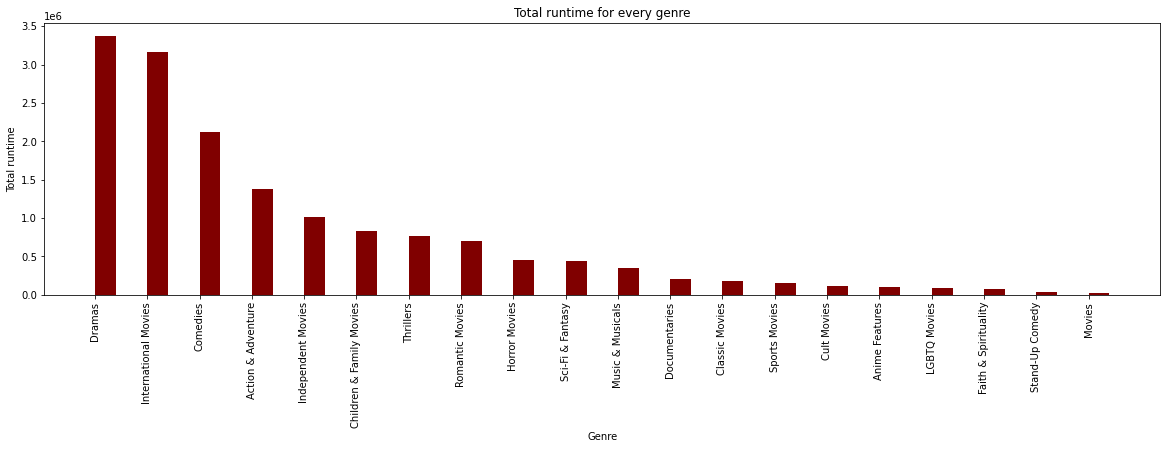

In [196]:
fig = plt.figure(figsize = (20, 5))
plt.xticks(rotation='vertical')
plt.bar(max_runtime_genre.index, max_runtime_genre.tolist(), color ='maroon',
        width = 0.4, align = 'edge')
plt.xlabel('Genre')
plt.ylabel('Total runtime')
plt.title('Total runtime for every genre')
plt.show()

### For which genre we see avg Total runtime

In [197]:

mean_runtime_genre = data_merged_duration.groupby('listed_in')['duration'].mean().sort_values(ascending = False)
mean_runtime_genre

listed_in
Classic Movies              126.979777
Dramas                      113.302872
Action & Adventure          113.166339
Music & Musicals            112.045499
International Movies        112.020701
Cult Movies                 111.034355
Romantic Movies             110.013256
Faith & Spirituality        109.006954
Sci-Fi & Fantasy            108.727025
Thrillers                   108.326439
Independent Movies          102.783201
Comedies                    102.024245
Sports Movies               101.289353
LGBTQ Movies                100.285203
Horror Movies                99.019033
Anime Features               95.920574
Documentaries                86.816369
Children & Family Movies     85.431788
Stand-Up Comedy              68.844444
Movies                       48.838631
Name: duration, dtype: float64

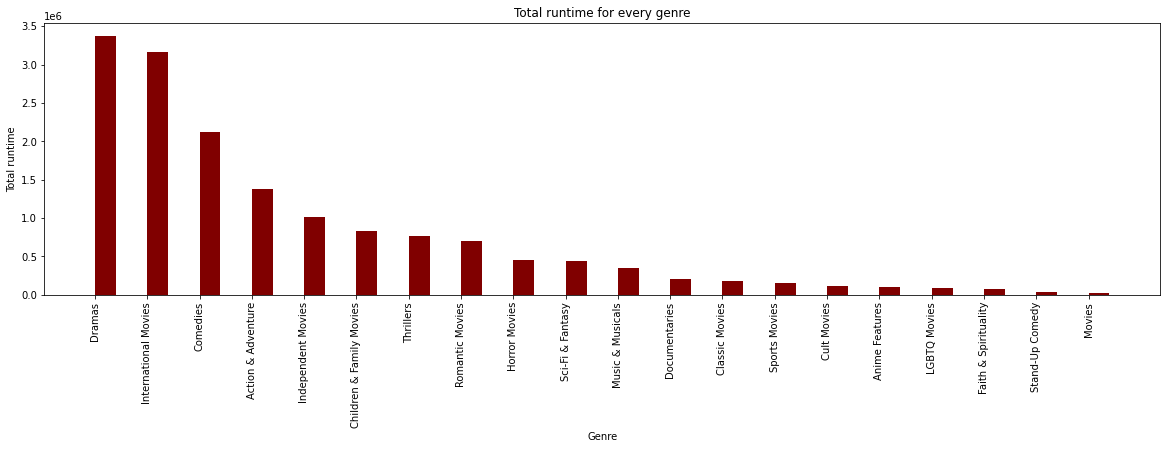

In [198]:
fig = plt.figure(figsize = (20, 5))
plt.xticks(rotation='vertical')
plt.bar(max_runtime_genre.index, max_runtime_genre.tolist(), color ='maroon',
        width = 0.4, align = 'edge')
plt.xlabel('Genre')
plt.ylabel('Total runtime')
plt.title('Total runtime for every genre')
plt.show()

### Avg rutime for every actor

In [199]:

data_merged_duration.groupby('cast')['duration'].mean()

cast
 Jr.                      84.000000
"Riley" Lakdhar Dridi     93.000000
'Najite Dede             112.000000
2Mex                      98.000000
4Minute                  107.000000
                            ...    
Şevket Çoruh             127.000000
Şinasi Yurtsever         100.777778
Şükran Ovalı             109.000000
Şükrü Özyıldız           109.000000
Ṣọpẹ́ Dìrísù              93.000000
Name: duration, Length: 25952, dtype: float64

### Avg rutime in every genre

In [200]:

data_merged_duration.groupby('listed_in')['duration'].mean()

listed_in
Action & Adventure          113.166339
Anime Features               95.920574
Children & Family Movies     85.431788
Classic Movies              126.979777
Comedies                    102.024245
Cult Movies                 111.034355
Documentaries                86.816369
Dramas                      113.302872
Faith & Spirituality        109.006954
Horror Movies                99.019033
Independent Movies          102.783201
International Movies        112.020701
LGBTQ Movies                100.285203
Movies                       48.838631
Music & Musicals            112.045499
Romantic Movies             110.013256
Sci-Fi & Fantasy            108.727025
Sports Movies               101.289353
Stand-Up Comedy              68.844444
Thrillers                   108.326439
Name: duration, dtype: float64

### which genre has max rutime

In [201]:

max_runtime_genres = data_merged_duration.groupby('listed_in')['duration'].max().sort_values(ascending = False)
max_runtime_genres

listed_in
International Movies        312
Sci-Fi & Fantasy            312
Dramas                      312
Documentaries               273
Comedies                    253
Romantic Movies             233
Classic Movies              229
Music & Musicals            224
Action & Adventure          214
Faith & Spirituality        205
Independent Movies          189
Cult Movies                 172
Horror Movies               171
Thrillers                   171
Sports Movies               161
Children & Family Movies    152
Stand-Up Comedy             146
LGBTQ Movies                143
Anime Features              140
Movies                      115
Name: duration, dtype: int16

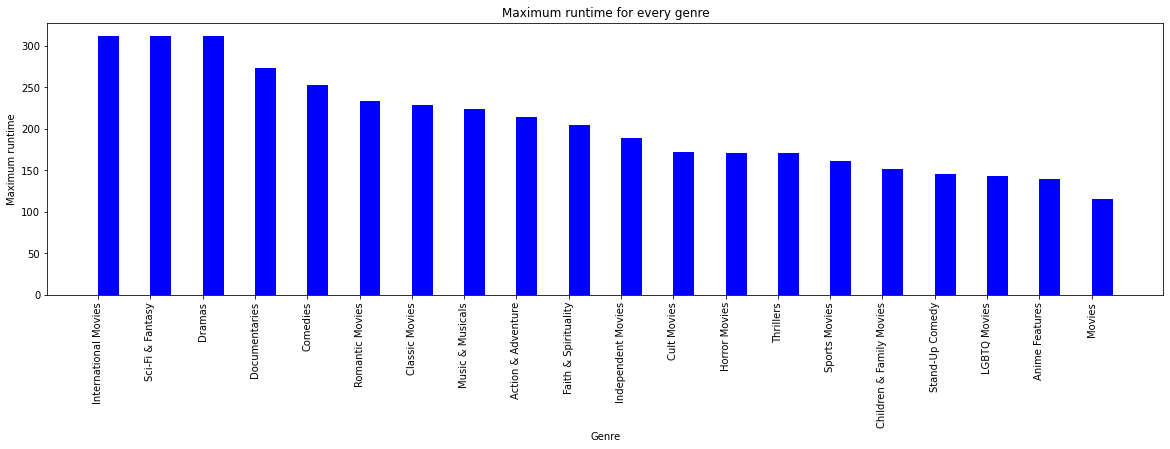

In [202]:
plt.figure(figsize = (20, 5))
plt.xticks(rotation='vertical')
plt.bar(max_runtime_genres.index, max_runtime_genres.tolist(), color ='blue',
        width = 0.4, align = 'edge')
plt.xlabel('Genre')
plt.ylabel('Maximum runtime')
plt.title('Maximum runtime for every genre')
plt.show()

### Avg rutime in every director

In [203]:

data_merged_duration.groupby('director')['duration'].mean().sort_values(ascending = False)

director
Houssam El-Din Mustafa    253.0
Samir Al Asfory           237.0
Fouad El-Mohandes         233.0
Fouad Al Shatti           204.0
Hussein Kamal             201.5
                          ...  
Timothy Ware-Hill           8.0
Arnon Manor                 8.0
Akira Saitoh                5.0
Limbert Fabian              3.0
Brandon Oldenburg           3.0
Name: duration, Length: 4777, dtype: float64

### Total rutime in every director

In [204]:

data_merged_duration.groupby('director')['duration'].sum().sort_values(ascending = False)

director
nan                    93525.0
Martin Scorsese        60600.0
Youssef Chahine        50506.0
Steven Spielberg       46169.0
Cathy Garcia-Molina    42440.0
                        ...   
Michael Govier            13.0
Arnon Manor                8.0
Timothy Ware-Hill          8.0
Limbert Fabian             6.0
Brandon Oldenburg          6.0
Name: duration, Length: 4777, dtype: float64

### How has the number of movies released per year changed over the last 20-30 years? 

In [245]:
data_30yr_movie = data[data.release_year >= 1988 ]
data_30yr_movie = data_30yr[data_30yr_movie.type == 'Movie' ]
# data_30yr = pd.DataFrame(data_30yr.groupby(['release_year'])['title'].nunique().sort_values(ascending = False))
data_30yr_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [246]:
pd.DataFrame(data_30yr_movie.groupby(['release_year'])['title'].nunique().sort_values(ascending = False))

,title
release_year,
2018,767
2017,767
2016,658
2019,633
2020,517
2015,398
2021,277
2014,264
2013,225


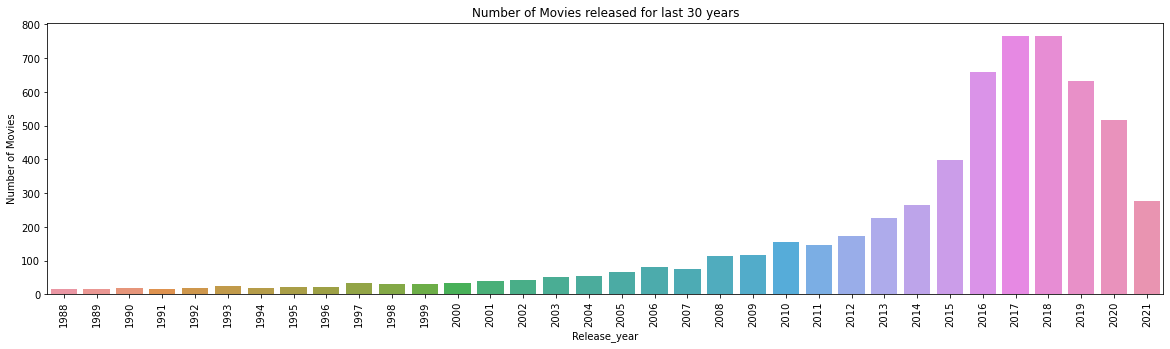

In [247]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'release_year', data = data_30yr_movie)
plt.xticks(rotation='vertical')
plt.xlabel('Release_year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies released for last 30 years')
plt.show()

In [248]:
data_30yr_movie.groupby(['release_year'])['title'].nunique().sort_values(ascending = False)

release_year
2018    767
2017    767
2016    658
2019    633
2020    517
2015    398
2021    277
2014    264
2013    225
2012    173
2010    154
2011    145
2009    118
2008    113
2006     82
2007     74
2005     67
2004     55
2003     51
2002     44
2001     40
1997     34
2000     33
1999     32
1998     32
1993     24
1995     23
1996     21
1994     20
1992     20
1990     19
1988     16
1991     16
1989     15
Name: title, dtype: int64

### How has the number of TV Show released per year changed over the last 20-30 years? 

In [251]:
data_30yr_TV = data[data.release_year >= 1988 ]
data_30yr_TV = data_30yr[data_30yr_TV.type == 'TV Show' ]
# data_30yr = pd.DataFrame(data_30yr.groupby(['release_year'])['title'].nunique().sort_values(ascending = False))
data_30yr_TV


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


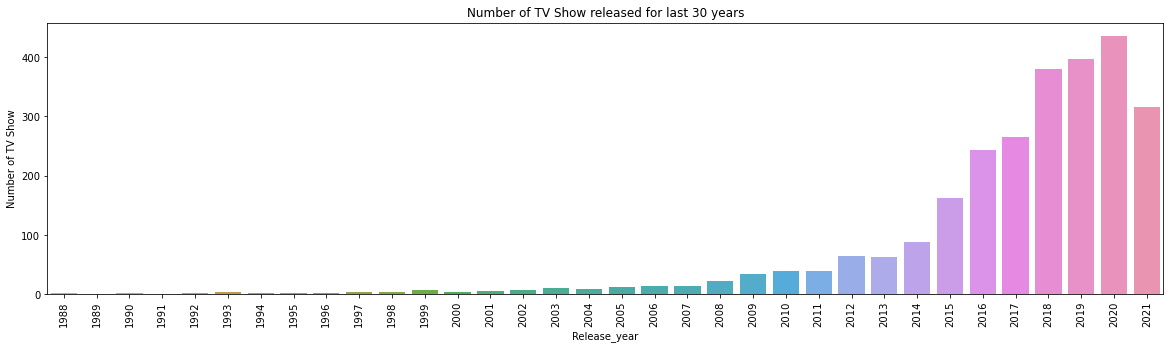

In [253]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'release_year', data = data_30yr_TV)
plt.xticks(rotation='vertical')
plt.xlabel('Release_year')
plt.ylabel('Number of TV Show')
plt.title('Number of TV Show released for last 30 years')
plt.show()

### Comparison of tv shows vs. movies.
##### Percentage of movies and TV show 

<AxesSubplot:ylabel='type'>

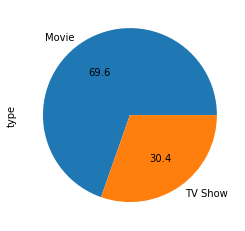

In [254]:

data['type'].value_counts().plot(kind = 'pie', autopct = '%.1f')

#### Unique director in Movie and TV show


In [255]:
data_merged.groupby('type')['director'].nunique().sort_values(ascending = False)

type
Movie      4778
TV Show     300
Name: director, dtype: int64

In [256]:
data_merged.groupby('type')['release_year'].nunique().sort_values(ascending = False)

type
Movie      73
TV Show    46
Name: release_year, dtype: int64

# Percentage of Movie based on Genre

In [296]:
data_movie_genre = data_merged[data_merged.type == 'Movie']
data_movie_genre.listed_in.value_counts()

Dramas                      29775
International Movies        28211
Comedies                    20829
Action & Adventure          12216
Independent Movies           9834
Children & Family Movies     9771
Thrillers                    7107
Romantic Movies              6412
Horror Movies                4571
Sci-Fi & Fantasy             4037
Music & Musicals             3077
Documentaries                2407
Sports Movies                1531
Classic Movies               1434
Cult Movies                  1077
Anime Features               1045
LGBTQ Movies                  838
Faith & Spirituality          719
Stand-Up Comedy               540
Movies                        412
Name: listed_in, dtype: int64

In [297]:
data_movie_genre = data_movie_genre.listed_in.value_counts(normalize = True)
data_movie_genre

Dramas                      0.204158
International Movies        0.193434
Comedies                    0.142818
Action & Adventure          0.083761
Independent Movies          0.067429
Children & Family Movies    0.066997
Thrillers                   0.048730
Romantic Movies             0.043965
Horror Movies               0.031342
Sci-Fi & Fantasy            0.027680
Music & Musicals            0.021098
Documentaries               0.016504
Sports Movies               0.010498
Classic Movies              0.009832
Cult Movies                 0.007385
Anime Features              0.007165
LGBTQ Movies                0.005746
Faith & Spirituality        0.004930
Stand-Up Comedy             0.003703
Movies                      0.002825
Name: listed_in, dtype: float64

In [301]:
data_movie_genre.keys()

Index(['Dramas', 'International Movies', 'Comedies', 'Action & Adventure',
       'Independent Movies', 'Children & Family Movies', 'Thrillers',
       'Romantic Movies', 'Horror Movies', 'Sci-Fi & Fantasy',
       'Music & Musicals', 'Documentaries', 'Sports Movies', 'Classic Movies',
       'Cult Movies', 'Anime Features', 'LGBTQ Movies', 'Faith & Spirituality',
       'Stand-Up Comedy', 'Movies'],
      dtype='object')

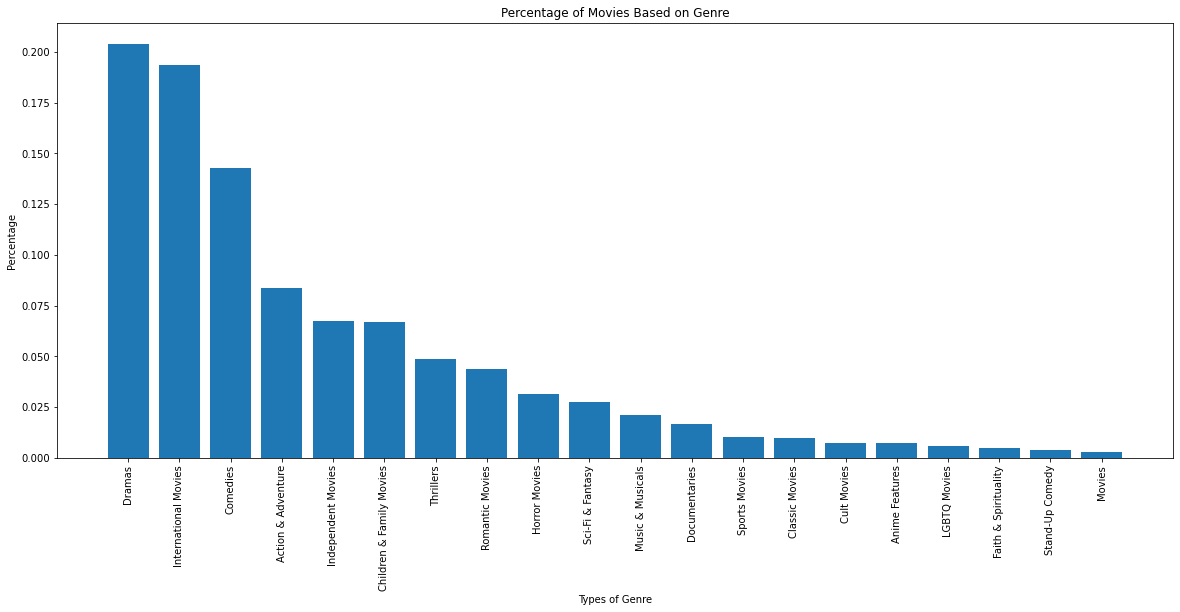

In [302]:
plt.figure(figsize=(20,8))
plt.title("Percentage of Movies Based on Genre")
plt.xlabel("Types of Genre")
plt.ylabel("Percentage")
plt.bar(x=data_movie_genre.keys(), height=data_movie_genre.tolist()) 
plt.xticks(rotation=90)
plt.show()

### What is the best time to launch a TV show?


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [219]:
data_merged.dtypes

show_id         object
type            object
title           object
date_added      object
release_year     int64
rating          object
description     object
cast            object
director        object
country         object
listed_in       object
dtype: object

In [220]:
data_TV_show =  data[data.type == 'TV Show']
data_TV_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [221]:
data_TV_show.date_added = pd.to_datetime(data_TV_show.date_added)

C:\Users\anura\AppData\Local\Temp\ipykernel_7648\3404594548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_TV_show.date_added = pd.to_datetime(data_TV_show.date_added)


In [222]:
data_TV_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 1 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2676 non-null   object        
 1   type          2676 non-null   object        
 2   title         2676 non-null   object        
 3   director      230 non-null    object        
 4   cast          2326 non-null   object        
 5   country       2285 non-null   object        
 6   date_added    2666 non-null   datetime64[ns]
 7   release_year  2676 non-null   int64         
 8   rating        2674 non-null   object        
 9   duration      2676 non-null   object        
 10  listed_in     2676 non-null   object        
 11  description   2676 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 271.8+ KB


In [223]:
data_TV_show['month'] = data_TV_show.date_added.dt.month_name(locale = 'English')
data_TV_show

C:\Users\anura\AppData\Local\Temp\ipykernel_7648\4002888941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_TV_show['month'] = data_TV_show.date_added.dt.month_name(locale = 'English')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,May
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",January
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,September
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",December


In [78]:
data_TV_show.groupby('month')['title'].nunique().sort_values(ascending = False)

month
December     266
July         262
September    251
August       236
June         236
October      215
April        214
March        213
November     207
May          193
January      192
February     181
Name: title, dtype: int64

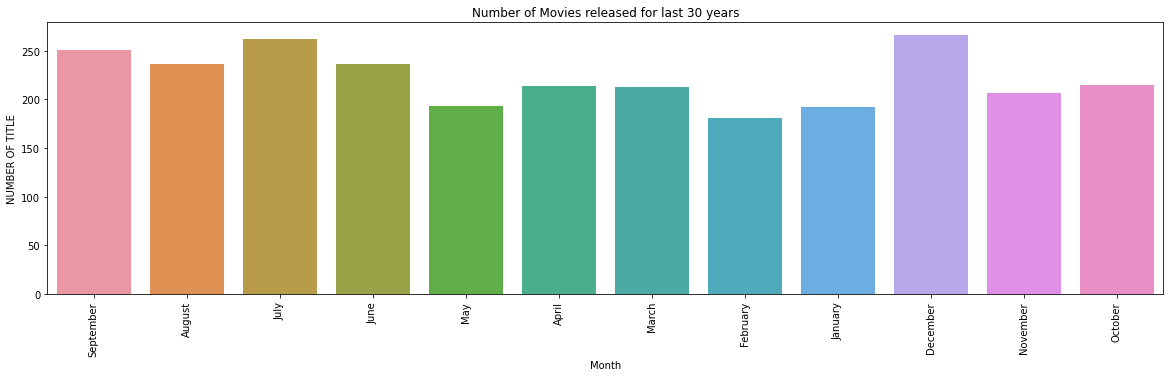

In [79]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'month', data = data_TV_show)
plt.xticks(rotation='vertical')
plt.xlabel('Month')
plt.ylabel('NUMBER OF TITLE')
plt.title('Number of Movies released for last 30 years')


plt.show()

### Analysis of actors/directors of different types of shows/movies.


### Does Netflix has more focus on TV Shows than movies in recent years


In [238]:
data_30yr = data[data.release_year >= 1988 ]

# data_30yr = pd.DataFrame(data_30yr.groupby(['release_year'])['title'].nunique().sort_values(ascending = False))
data_30yr

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


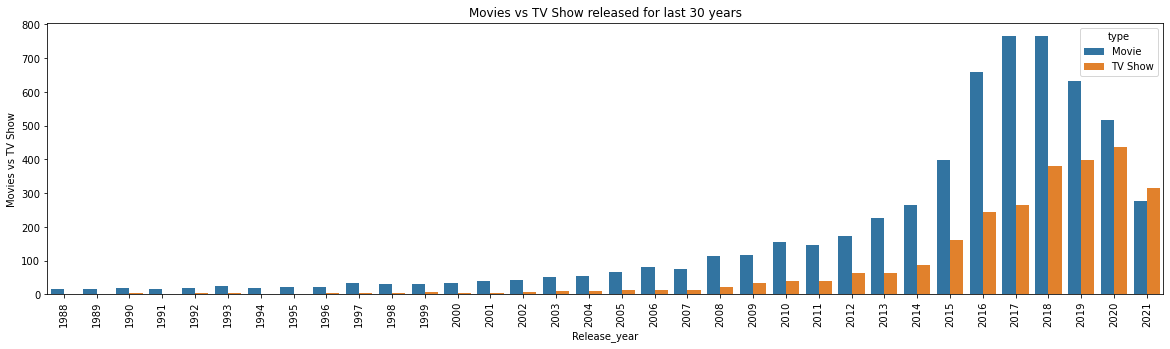

In [239]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'release_year', data = data_30yr, hue = 'type')
plt.xticks(rotation='vertical')
plt.xlabel('Release_year')
plt.ylabel('Movies vs TV Show')
plt.title('Movies vs TV Show released for last 30 years')
plt.show()

### Understanding what content is available in different countries

In [81]:
data_merged_duration.groupby('country')['release_year'].nunique().sort_values(ascending = False)

country
United States     69
India             57
United Kingdom    44
Hong Kong         38
nan               35
                  ..
Nicaragua          1
Palestine          1
Panama             1
Paraguay           1
Malawi             1
Name: release_year, Length: 123, dtype: int64

In [82]:
data_merged_duration.groupby([ 'listed_in','country'])['release_year'].nunique().sort_values(ascending = False)

listed_in             country      
Dramas                United States    57
International Movies  India            56
Action & Adventure    United States    53
Dramas                India            53
Comedies              United States    44
                                       ..
Independent Movies    Malawi            1
                      Jordan            1
                      Iran              1
                      Indonesia         1
Action & Adventure    Angola            1
Name: release_year, Length: 923, dtype: int64

<Figure size 1440x360 with 0 Axes>

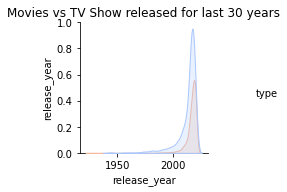

In [83]:

plt.figure(figsize = (20, 5))
sns.pairplot(data, hue ="type", palette ='coolwarm')
plt.xticks(rotation='vertical')
plt.xlabel('Release_year')
plt.ylabel('Movies vs TV Show')
plt.title('Movies vs TV Show released for last 30 years')
plt.show()

<Figure size 1440x360 with 0 Axes>

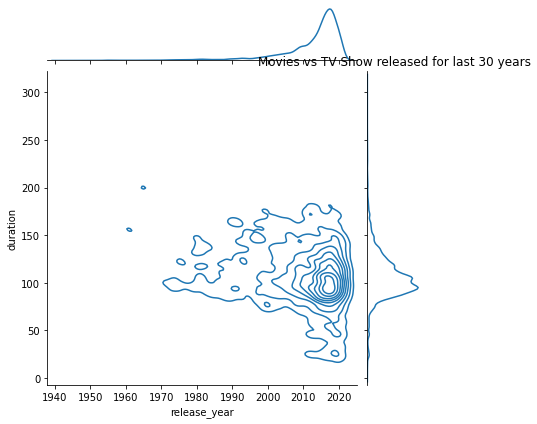

In [84]:
plt.figure(figsize = (20, 5))

sns.jointplot(x ='release_year', y ='duration', data = data_merged_duration, kind ='kde')
# KDE shows the density where the points match up the most
plt.xticks(rotation='vertical')
plt.xlabel('Release_year')
plt.ylabel('Movies vs TV Show')
plt.title('Movies vs TV Show released for last 30 years')
plt.show()

<Figure size 1440x360 with 0 Axes>

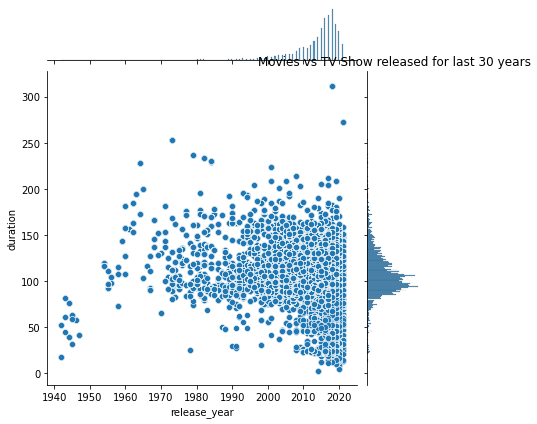

In [85]:
plt.figure(figsize = (20, 5))

sns.jointplot(x ='release_year', y ='duration', data = data_merged_duration)
# KDE shows the density where the points match up the most
plt.xticks(rotation='vertical')
plt.xlabel('Release_year')
plt.ylabel('Movies vs TV Show')
plt.title('Movies vs TV Show released for last 30 years')
plt.show()

In [86]:
data_TV_show[['release_year', 'month']]

,release_year,month
1,2021,September
2,2021,September
3,2021,September
4,2021,September
5,2021,September
...,...,...
8795,2015,May
8796,2016,January
8797,2016,September
8800,2012,December


In [87]:
sns.heatmap(data = data_merged_duration[['release_year', 'duration']])

 # Insights and recommendations


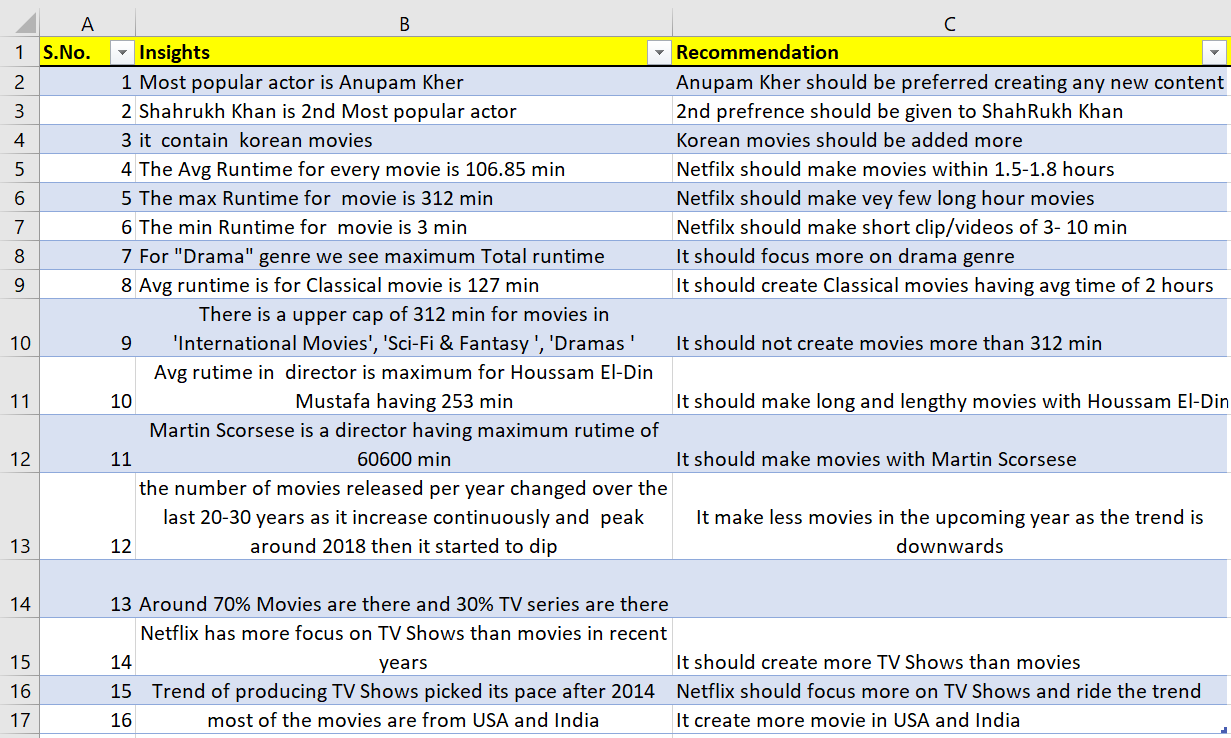